In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX


## 一元线性回归的梯度下降

### 一元二次方程
y = (x-2.5)^2 -1

In [2]:
x = np.linspace(-1,6,200)
y = (x - 2.5)**2 - 1

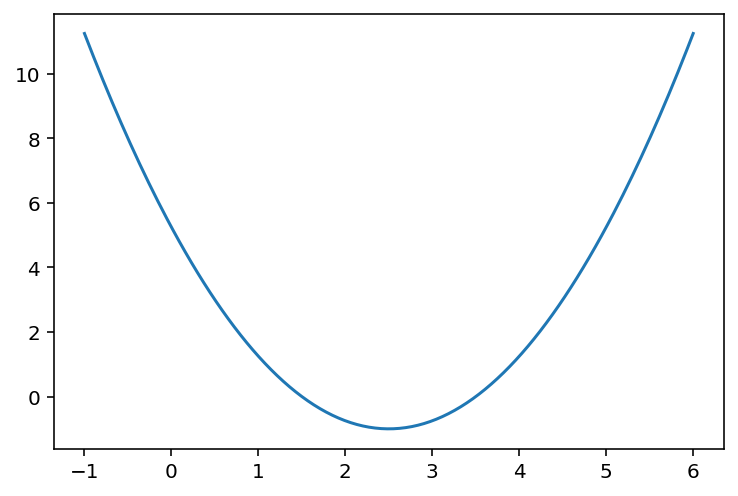

In [3]:
plt.plot(x, y)
plt.show()

In [4]:
def j(x):
    """一元二次方程"""
    return (x-2.5)**2 - 1

def dj(x):
    """求导"""
    return 2 * (x-2.5)

def func(theta=0.0, eta=0.01, epsilon = 1e-8, max_iters=10000):
    """
    eta: 学习率
    """
    theta_history = [theta]
    while max_iters>0:
        gradient = dj(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        
        if(abs(j(theta)-j(last_theta)) < epsilon):
            break
        max_iters -= 1
    print('theta: ', theta)
    print('j(theta): ', j(theta))
    print('theta_history length: ', len(theta_history))
    plt.plot(x, y)
    plt.plot(np.array(theta_history), j(np.array(theta_history)), color="r", marker='+')
    plt.show()
    

theta:  2.4995140741236224
j(theta):  -0.9999997638760426
theta_history length:  424


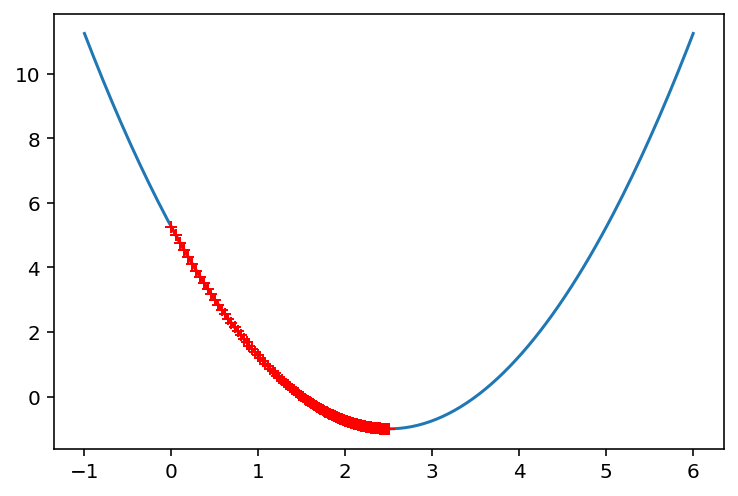

In [5]:
# 使用默认参数
func()

theta:  2.1617294618056784
j(theta):  -0.885573042989724
theta_history length:  10001


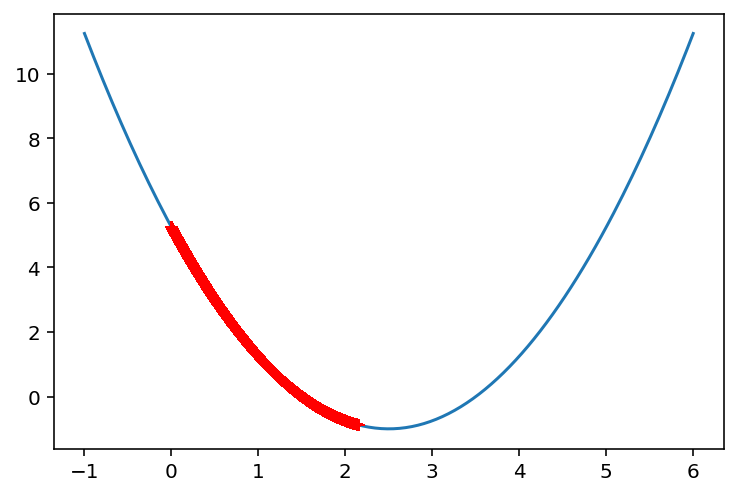

In [6]:
# 当学习率eta比较小时，下降的步子很小。程序需要循环很多次才会找到最小值。 一般学习率会设置为0.01
func(eta=0.0001)

theta:  2.500054842376601
j(theta):  -0.9999999969923137
theta_history length:  22


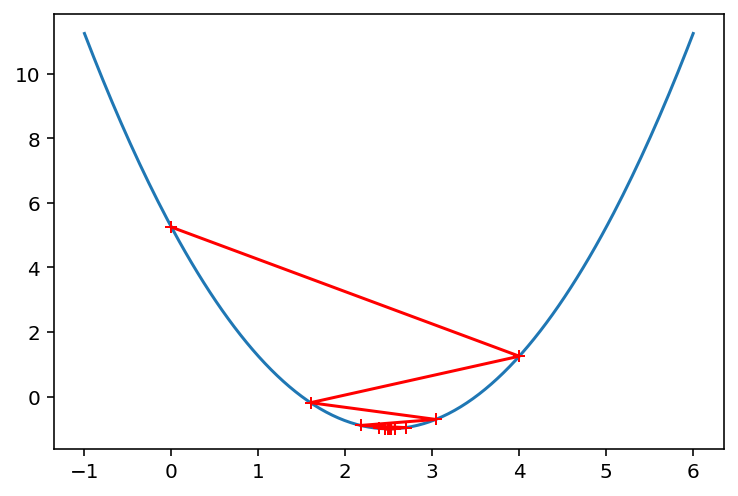

In [7]:
# 当学习率eta较大时候，当特别大时，如5，程序会陷入死循环
func(eta=0.8)

theta:  82.5
j(theta):  6399.0
theta_history length:  6


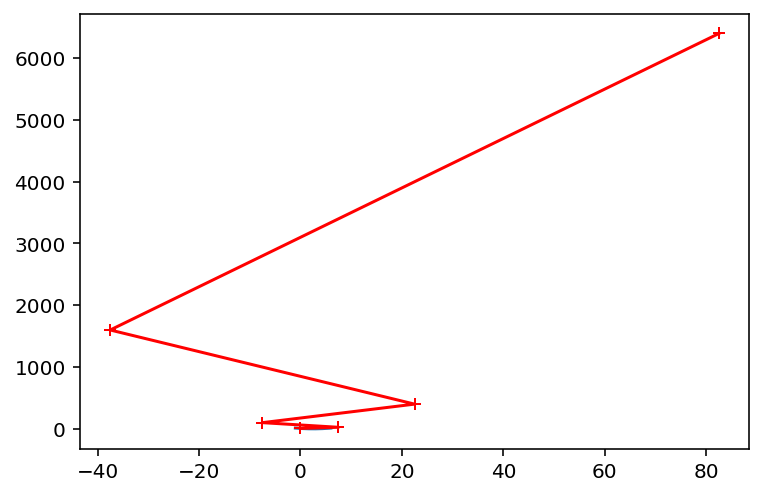

In [8]:
# 当特别大时，如1.5.
func(eta=1.5, max_iters=5)

## 线性回归模型中使用梯度下降

In [55]:
num_size = 500
np.random.seed(100)
x = np.random.random(size=num_size)
y = 10 * x - np.random.normal(size=num_size) * 2

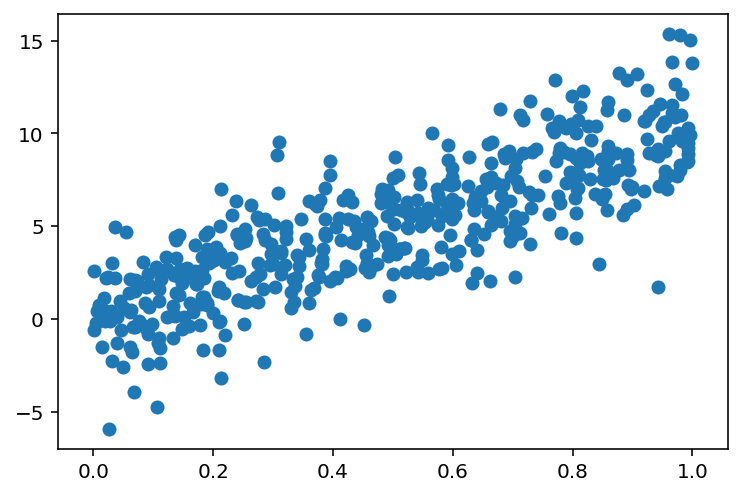

In [57]:
plt.scatter(x, y)